In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from scipy.signal import convolve, deconvolve

## Parte 1: Sistemas

**Ejercicio 1:** Para cada uno de los siguientes sistemas determine si son:

causales, 

lineales,

invariantes en el tiempo 

y si poseen memoria. 

En cada caso grafique la salida del sistema $y[n]$ para una entrada dada.


1. $y[n] = g[n]x[n]$, donde $g[n] = A \sin(\omega n T)$ siendo $A$ constante, $\omega = 2\pi f$ y $T$ el período de muestreo.

**Causal**: la salida y[n]y[n] depende sólo del valor actual de x[n]x[n].

**Lineal**: es una multiplicación, cumple superoposicion.

**Invariante**: se desplaza solo x[n] y g[n] no se desplaza, solo se multiplica.
   $T{x[n - n₀]} = x[n - n₀]·g[n]$
   No coincide con $y[n - n₀]$ porque $g[n]$ no se desplaza.

**Memoria** No posee memoria. Depende solo de $x[n]$


\begin{array}{|c|c|l|}
\hline
\textbf{Propiedad} & \textbf{¿Se cumple?} & \textbf{Justificación breve} \\
\hline
\text{Causalidad} & \text{Sí} & \text{Depende solo del valor actual de } x[n] \\
\hline
\text{Linealidad} & \text{ Sí} & \text{Multiplicación escalar, cumple superposición} \\
\hline
\text{Memoria} & \text{ No} & \text{Solo depende de } x[n], \text{ no de valores pasados o futuros} \\
\hline
\text{Invarianza} & \text{No} & \text{El desplazamiento en } x[n] \text{ no afecta a } g[n] \Rightarrow y[n - n_0] \neq T\{x[n - n_0]\} \\
\hline
\end{array}





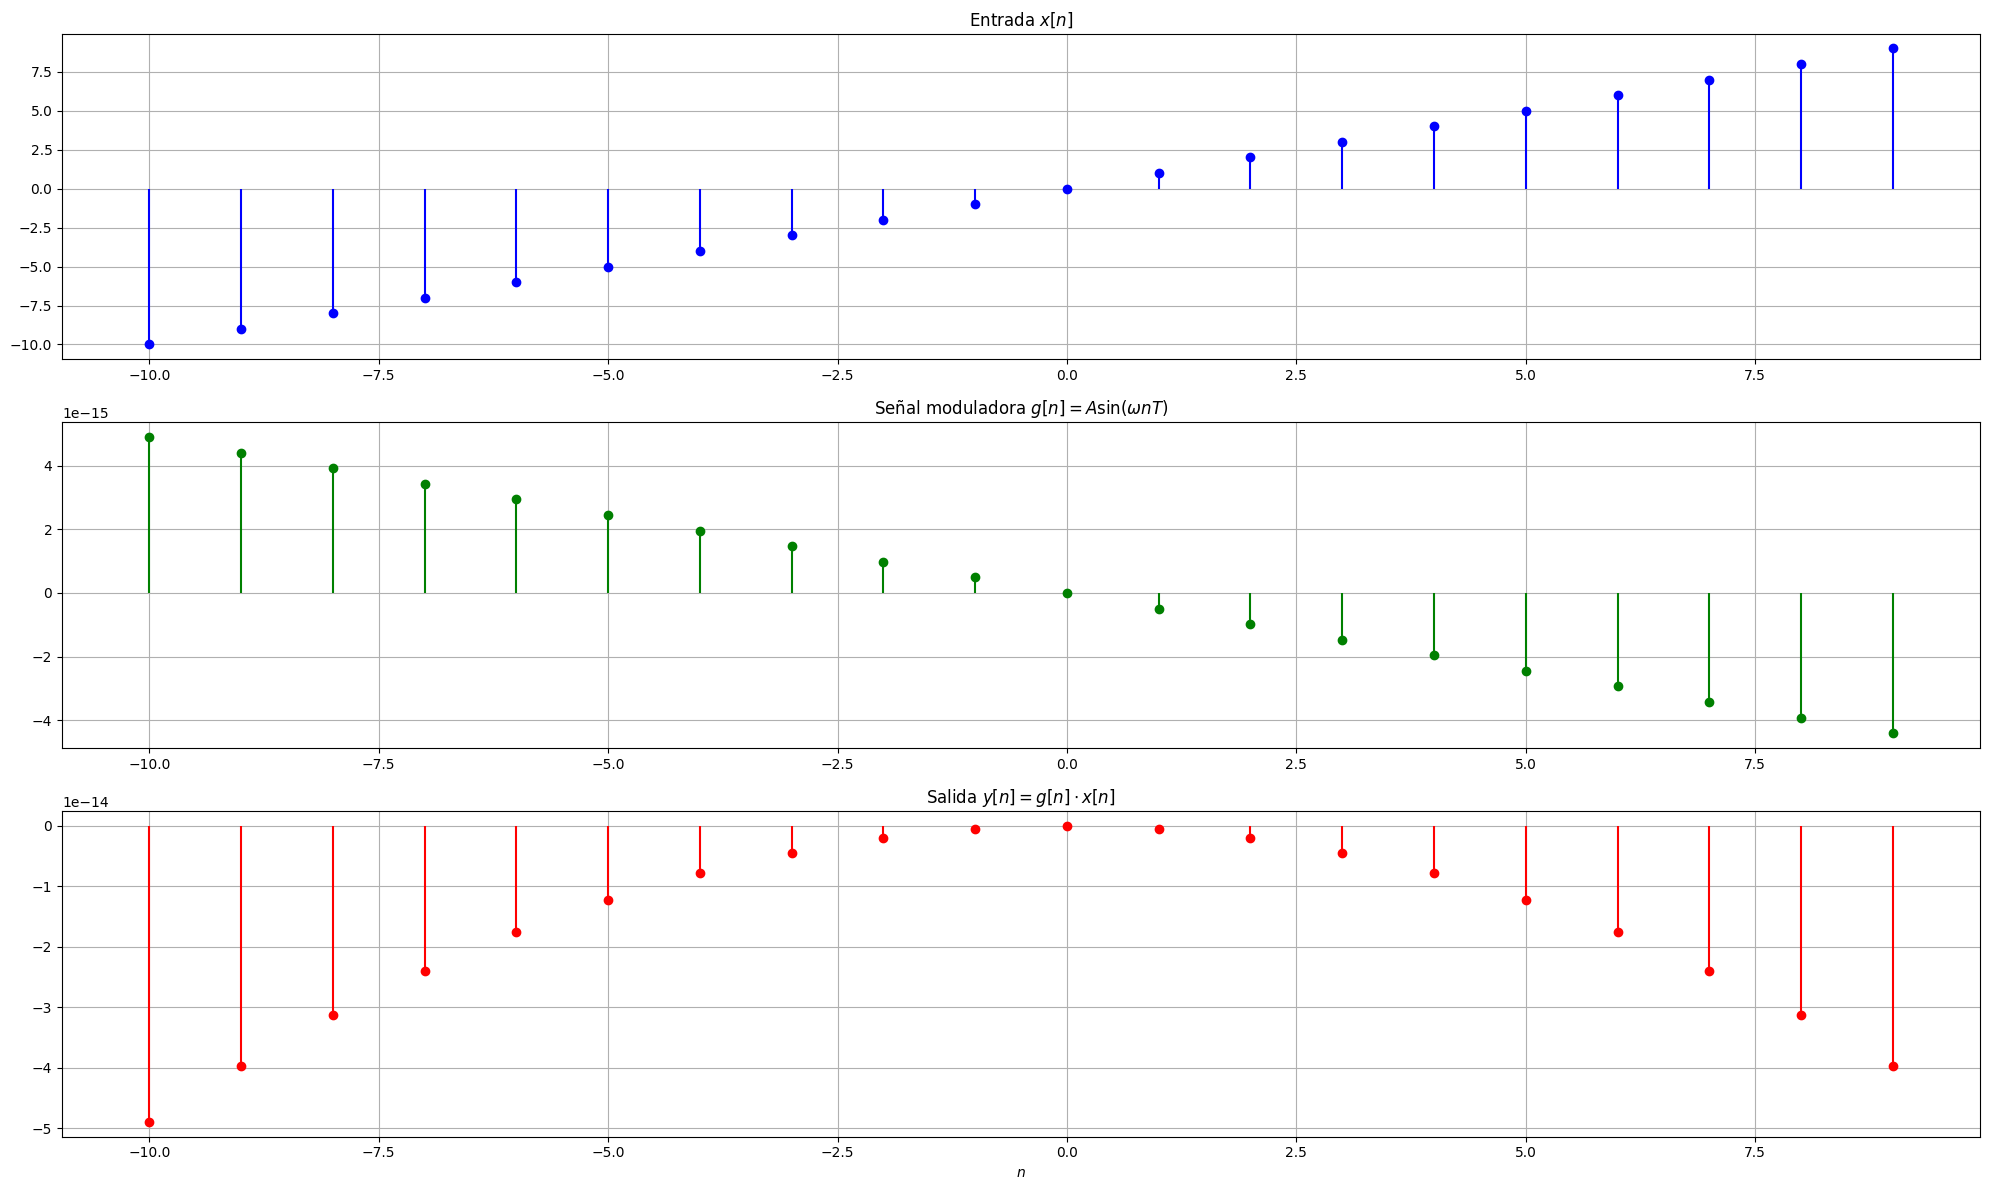

In [2]:
n = np.arange(-10, 10)
g = 2 * np.sin( 2 * np.pi * 0.5 * n * 2)
                 
x = n
y = g * x


plt.figure(figsize=(20, 12))

plt.subplot(3, 1, 1)
plt.stem(n, x, basefmt=" ", linefmt='b-', markerfmt='bo')
plt.title("Entrada $x[n]$")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n, g, basefmt=" ", linefmt='g-', markerfmt='go')
plt.title("Señal moduladora $g[n] = A \\sin(\\omega n T)$")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n, y, basefmt=" ", linefmt='r-', markerfmt='ro')
plt.title("Salida $y[n] = g[n] \\cdot x[n]$")
plt.xlabel("$n$")
plt.grid(True)

plt.tight_layout()
plt.show()


2. $y[n] = \sum\limits_{k=n-n_0}^{n+n_0} x[k]$

    **Causal:** No es causal porque depende de valores $futuros$. 
    La salida $y[n]$ depende de valores futuros de la entrada $x[k]$, específicamente de $x[n+1],x[n+2],…,x[n+n0]x[n+1],x[n+2],…,x[n+n0​]$.

    $Ejemplo: para n=0, el sistema usa x[k] con k>0$.

    **Lineal**: Es Lineal. Cumple la $adtivididad$ y $superposición$ (se explica multiplicando por un escalar)

    **Memoria**:Posee memoria.
    La salida $y[n]$ depende de valores pasados y futuros de la entrada $x[k]$.
    Esto significa que el sistema necesita acceder a más de un valor de la señal de entrada para calcular la salida.

    **Invarianza:**
    Supongamos que desplazamos la entrada:
    $$x_{1}[n] = x[n - n_{1}]$$

    $$y_{1}[n] = \sum\limits_{k = n - n_{0}}^{n + n_0} x_{1}[k] = \sum_{k = n - n_{0}}^{n + n_{0}} x[k - n_{1}] $$
        

    Hacemos un cambio de variable $m = k - n_{1} \Rightarrow k = m + n_{1} $, entonces:

    $$y_1[n] = \sum\limits_{m = n - n_{0} - n_{1}}^{n + n_{0} - n_{1}} x[m] $$

        

    $$y[n] = \sum\limits_{k = n - n_{0}}^{n + n_{0}} x[k]$$
    

    $$y[n - n_{1}] = \sum\limits_{k = n - n_{1} - n_{0}}^{n - n_{1} + n_{0}} x[k]$$
        

    Invariante en el tiempo


    

\begin{array}{|c|c|l|}
\hline
\textbf{Propiedad} & \textbf{¿Se cumple?} & \textbf{Justificación breve} \\
\hline
\text{Causalidad} & \text{ No} & \text{Usa valores futuros de } x[n] \\
\hline
\text{Linealidad} & \text{ Sí} & \text{Suma ponderada lineal} \\
\hline
\text{Memoria} & \text{ Sí} & \text{Depende de varios valores de entrada} \\
\hline
\text{Invarianza} & \text{ Sí} & \text{Desplazamiento en entrada produce mismo desplazamiento en salida} \\
\hline
\end{array}




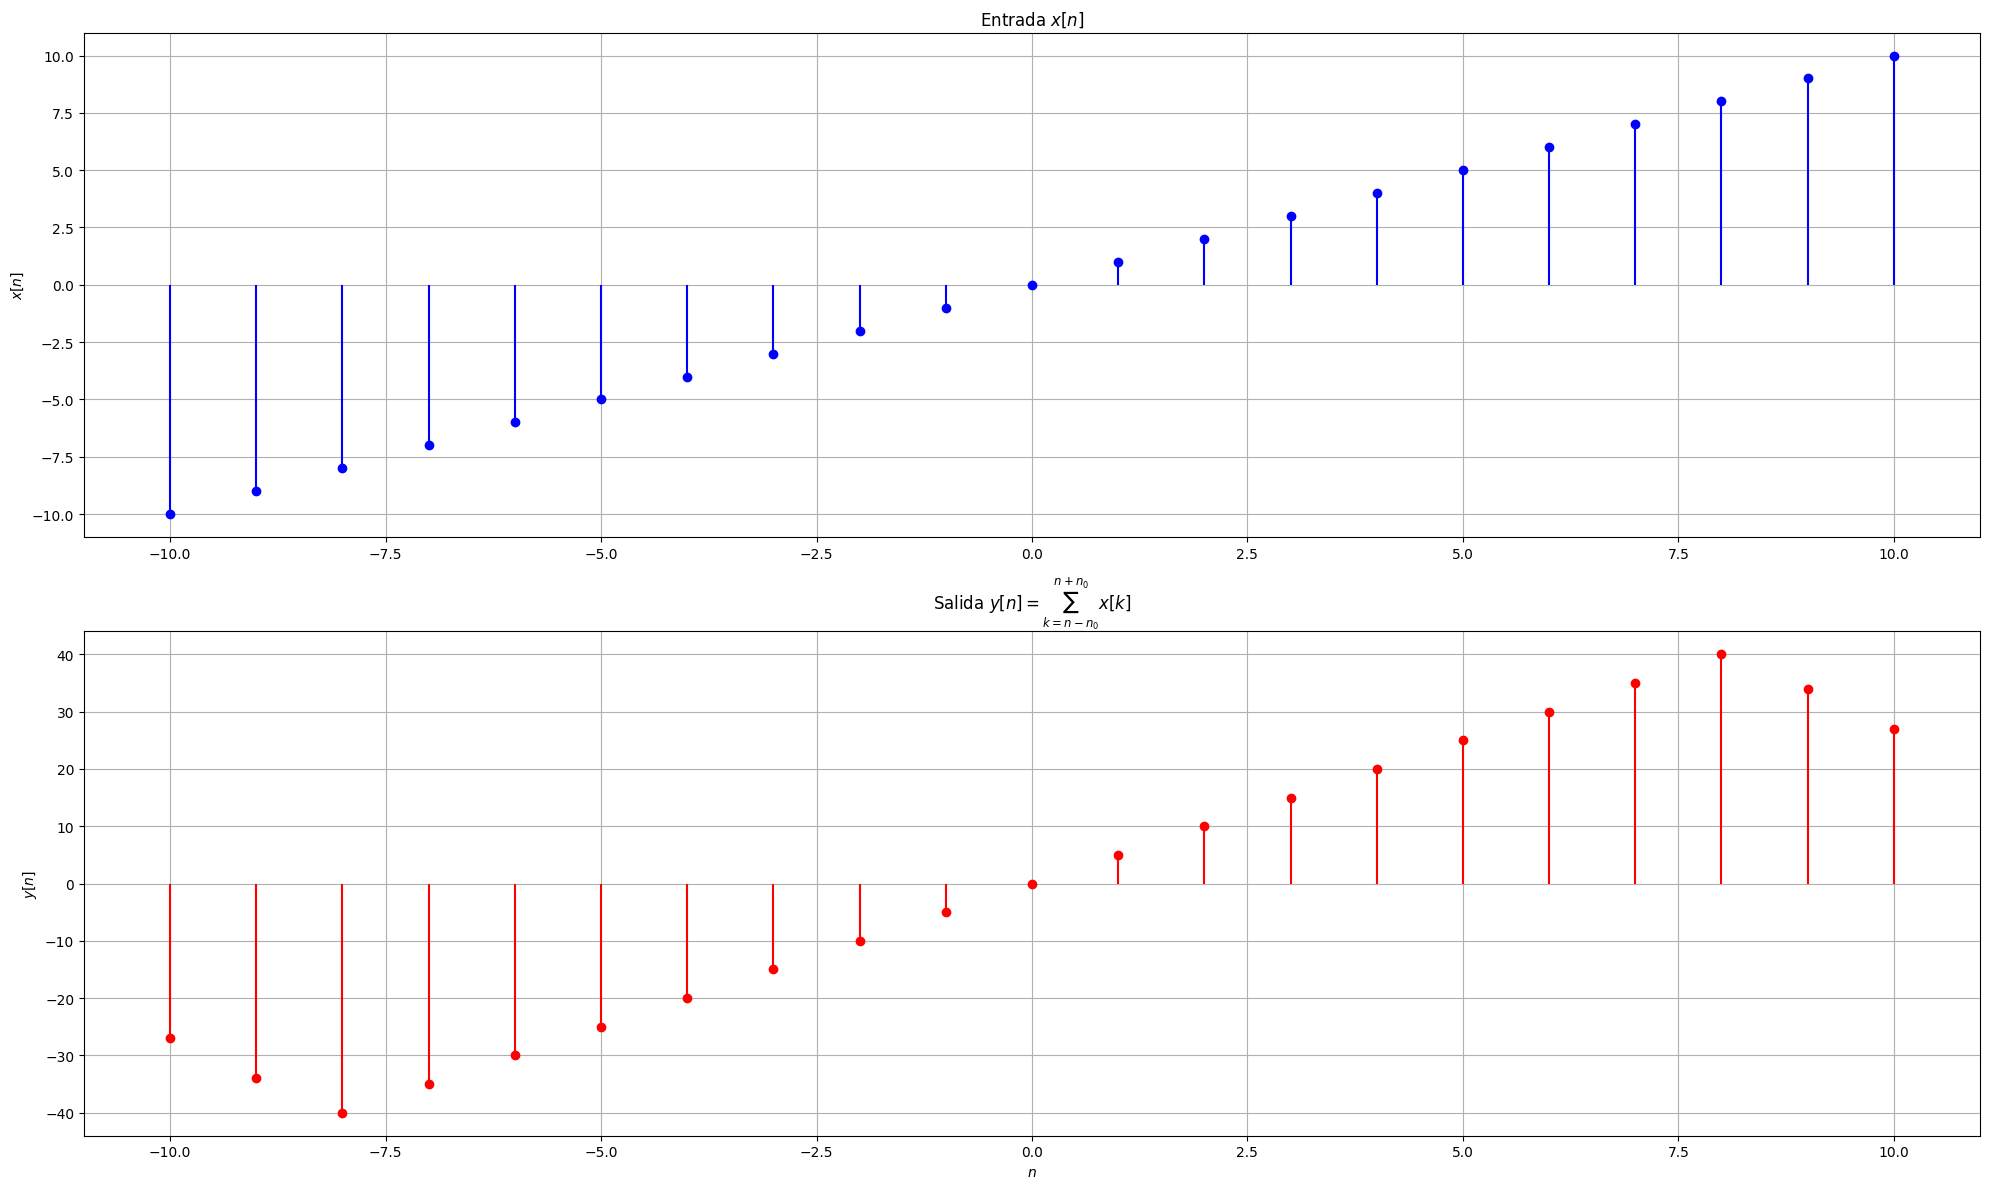

In [3]:
n = np.arange(-10, 11)
n0 = 2  


#x = np.sin(2 * np.pi * n)
x = np.arange(-10, 11)
y = np.zeros_like(n, dtype=float)
for i, ni in enumerate(n):
    indices = (n >= ni - n0) & (n <= ni + n0)
    y[i] = np.sum(x[indices])

plt.figure(figsize=(20, 12))

plt.subplot(2, 1, 1)
plt.stem(n, x, basefmt=" ", linefmt='b-', markerfmt='bo')
plt.title("Entrada $x[n]$")
plt.ylabel("$x[n]$")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(n, y, basefmt=" ", linefmt='r-', markerfmt='ro')
plt.title(r"Salida $y[n] = \sum_{k=n-n_0}^{n+n_0} x[k]$")
plt.xlabel("$n$")
plt.ylabel("$y[n]$")
plt.grid(True)

plt.tight_layout()
plt.show()


3. $y[n] = x[n] + 2$

    **Causal:** Es causal porque la salida $y[n]$ depende únicamente del valor actual de la entrada $x[n]$.

    **Lineal:** No es lineal.  No cumple superposición
     Si se aplica una constante $\alpha$, tenemos:

    $αy[n]=α(x[n]+2)=αx[n]+2α$


    Pero si se aplica la entrada escalada:

    $yα[n]=(αx[n])+2$

    No es igual a $αy[n]αy[n]$
   

    **Memoria** : No posee memoria. La salida en el instante $n$ solo depende del valor actual $x[n]$.

    **Invarianza:** Invariante en el tiempo.
    Entrada desplazada:

    $$x1[n]=x[n−n0]⇒y1[n]=x[n−n0]+2$$

    Salida desplazada:

    $$y[n−n0]=x[n−n0]+2 ⇒y[n−n0]=T{x[n−n0]}$$

    
\begin{array}{|c|c|l|}
\hline
\textbf{Propiedad} & \textbf{¿Se cumple?} & \textbf{Justificación breve} \\
\hline
\text{Causalidad} & \text{Sí} & \text{Depende solo de } x[n] \\
\hline
\text{Linealidad} & \text{No} & \text{No cumple homogeneidad: } \alpha y[n] \neq y_{\alpha}[n] \\
\hline
\text{Memoria} & \text{No} & \text{No depende de valores pasados ni futuros} \\
\hline
\text{Invarianza} & \text{Sí} & \text{El desplazamiento en la entrada produce igual desplazamiento en la salida} \\
\hline
\end{array}




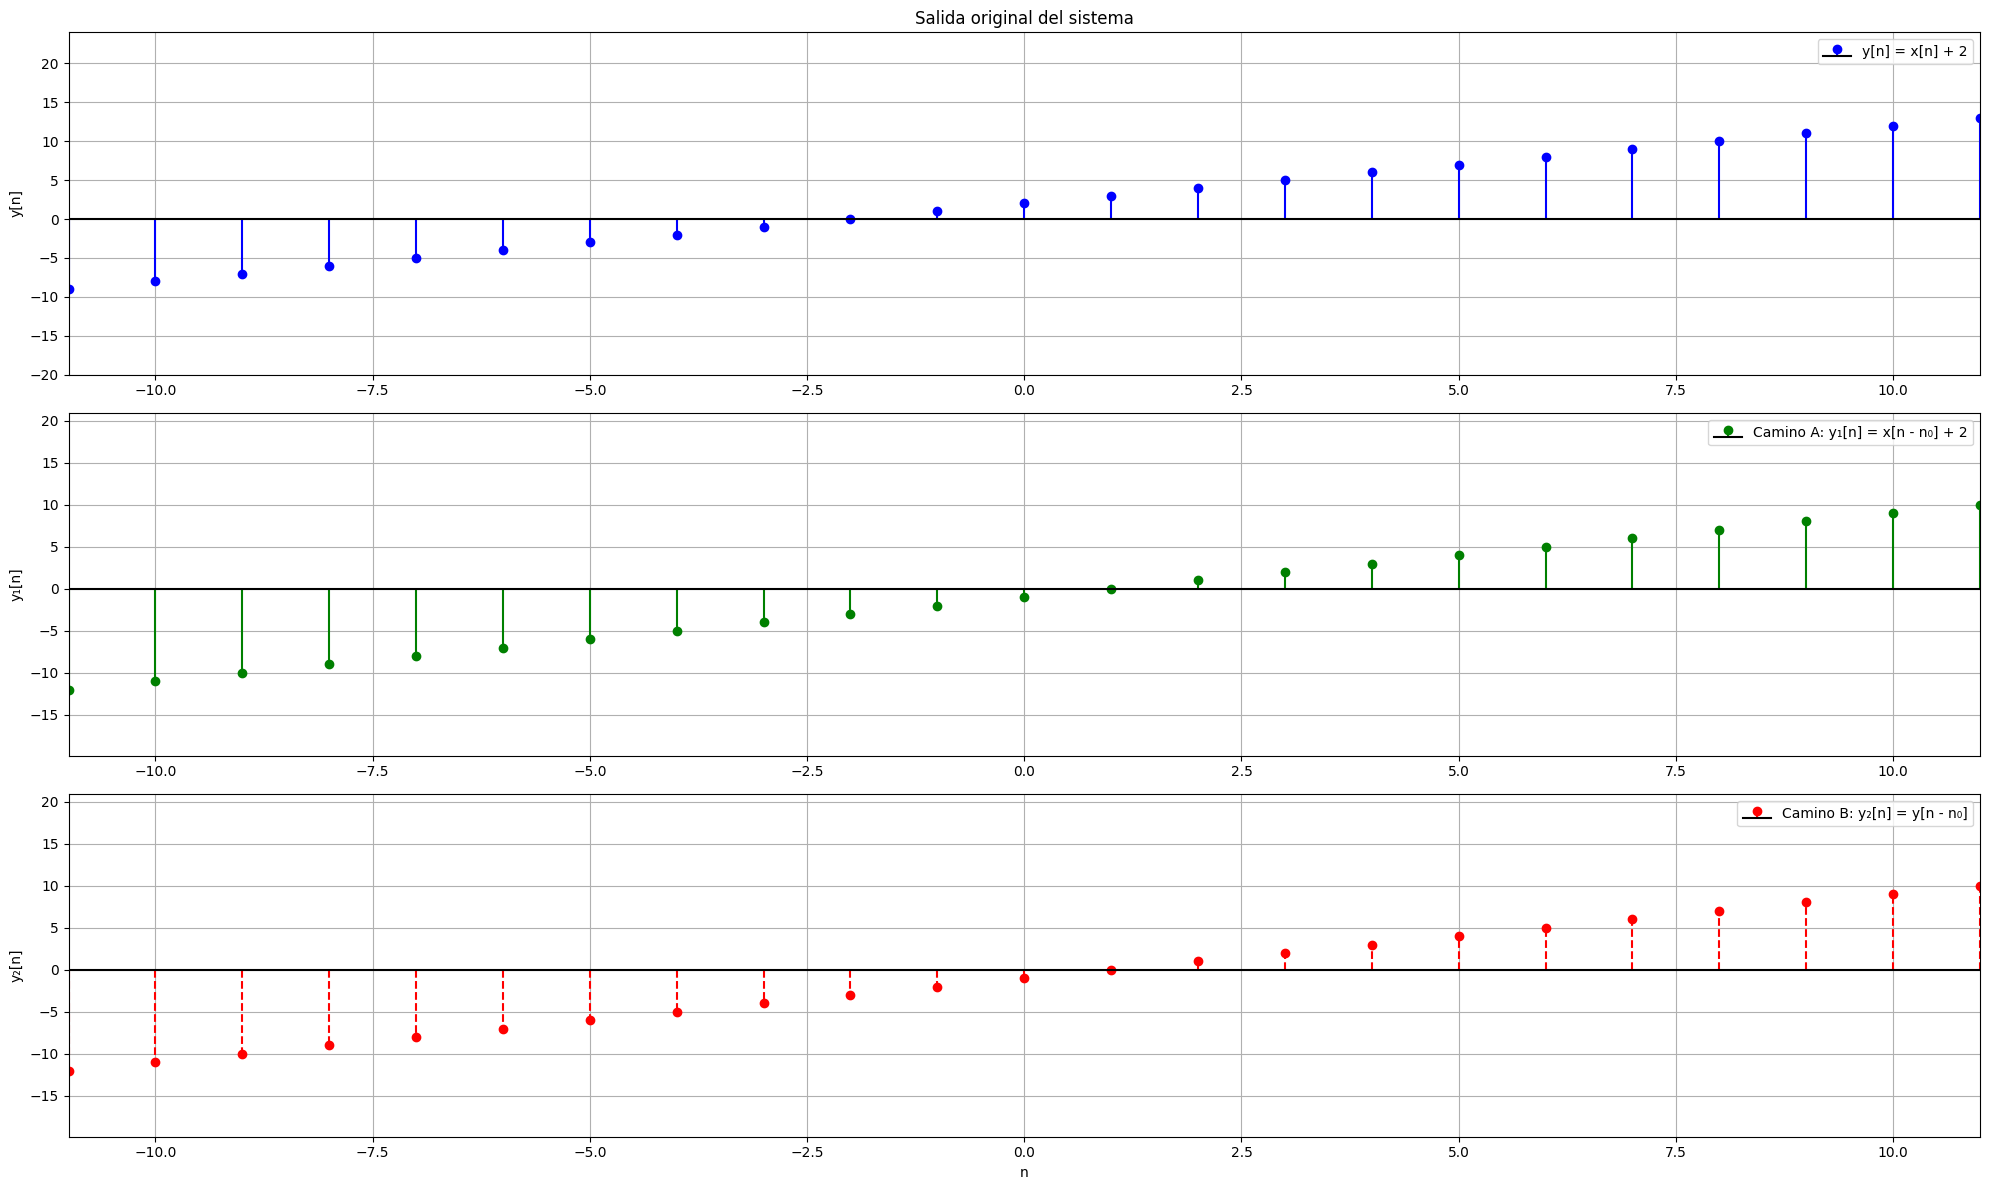

In [18]:
n = np.arange(-20, 21,1)
desplazamiento = 3 

x = n
y = x + 2 
# Camino A: desplazar la entrada y luego aplicar el sistema
x_shifted = np.roll(x, desplazamiento)         # x[n - n0]
x_shifted[:desplazamiento] = 0                 
y1 = x_shifted + 2                 # y₁[n] = x[n - n₀] + 2

# Camino B: aplicar el sistema y luego desplazar la salida
y2 = np.roll(y, desplazamiento)                # y[n - n0]
y2[:desplazamiento] = 0


plt.figure(figsize=(20, 12))
plt.subplot(3, 1, 1)
plt.stem(n, y, linefmt='b-', markerfmt='bo', basefmt='k-', label='y[n] = x[n] + 2')
plt.title('Salida original del sistema')
plt.ylabel('y[n]')
plt.xlim(-11,11)
plt.grid(True)
plt.legend()
plt.subplot(3, 1, 2)
plt.stem(n, y1, linefmt='g-', markerfmt='go', basefmt='k-', label='Camino A: y₁[n] = x[n - n₀] + 2')
plt.ylabel('y₁[n]')
plt.xlim(-11,11)
plt.grid(True)
plt.legend()
plt.subplot(3, 1, 3)
plt.stem(n, y2, linefmt='r--', markerfmt='ro', basefmt='k-', label='Camino B: y₂[n] = y[n - n₀]')
plt.xlabel('n')
plt.ylabel('y₂[n]')
plt.xlim(-11,11)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


4. $y[n] = n x[n]$

**Causalidad:** Es causal. La salida $y[n]$ depende únicamente del valor actual $x[n]$ y del índice $n$, que representa el instante actual.

**Linealidad:** Es lineal. Cumple superposición

$$ T{a⋅x_{1}​[n]+b⋅x_{2}​[n]}=n⋅(ax_{1}​[n]+bx_{2}​[n])=a⋅nx_{1}​[n]+b⋅nx_{2}​[n]$$

**Invarianza:** 
Desplazando la entrada:
   $$ y1​[n]=T{x[n−n0​]}=n⋅x[n−n0​]$$

Pero si desplazás la salida:

$$y[n−n0]=(n−n0)⋅x[n−n0]$$

Entonces:
Como $y1[n]≠y[n−n0]$, el sistema no es invariante en el tiempo.


**Memoria:** El sistema no posee memoria, ya que la salida en el instante nn depende únicamente de $x[n]$ y de $n$, y no de valores pasados ni futuros de la señal de entrada.


\begin{array}{|c|c|l|}
\hline
\textbf{Propiedad} & \textbf{¿Se cumple?} & \textbf{Justificación breve} \\
\hline
\text{Causalidad} & \text{ Sí} & \text{Depende solo del valor actual de } x[n] \\
\hline
\text{Linealidad} & \text{ Sí} & \text{Cumple homogeneidad y superposición: } T\{ax_1 + bx_2\} = aT\{x_1\} + bT\{x_2\} \\
\hline
\text{Memoria} & \text{No} & \text{Solo depende de } x[n], \text{ no usa valores pasados o futuros} \\
\hline
\text{Invarianza} & \text{ No} & \text{Desplazar la entrada y desplazar la salida no producen el mismo resultado} \\
\hline
\end{array}



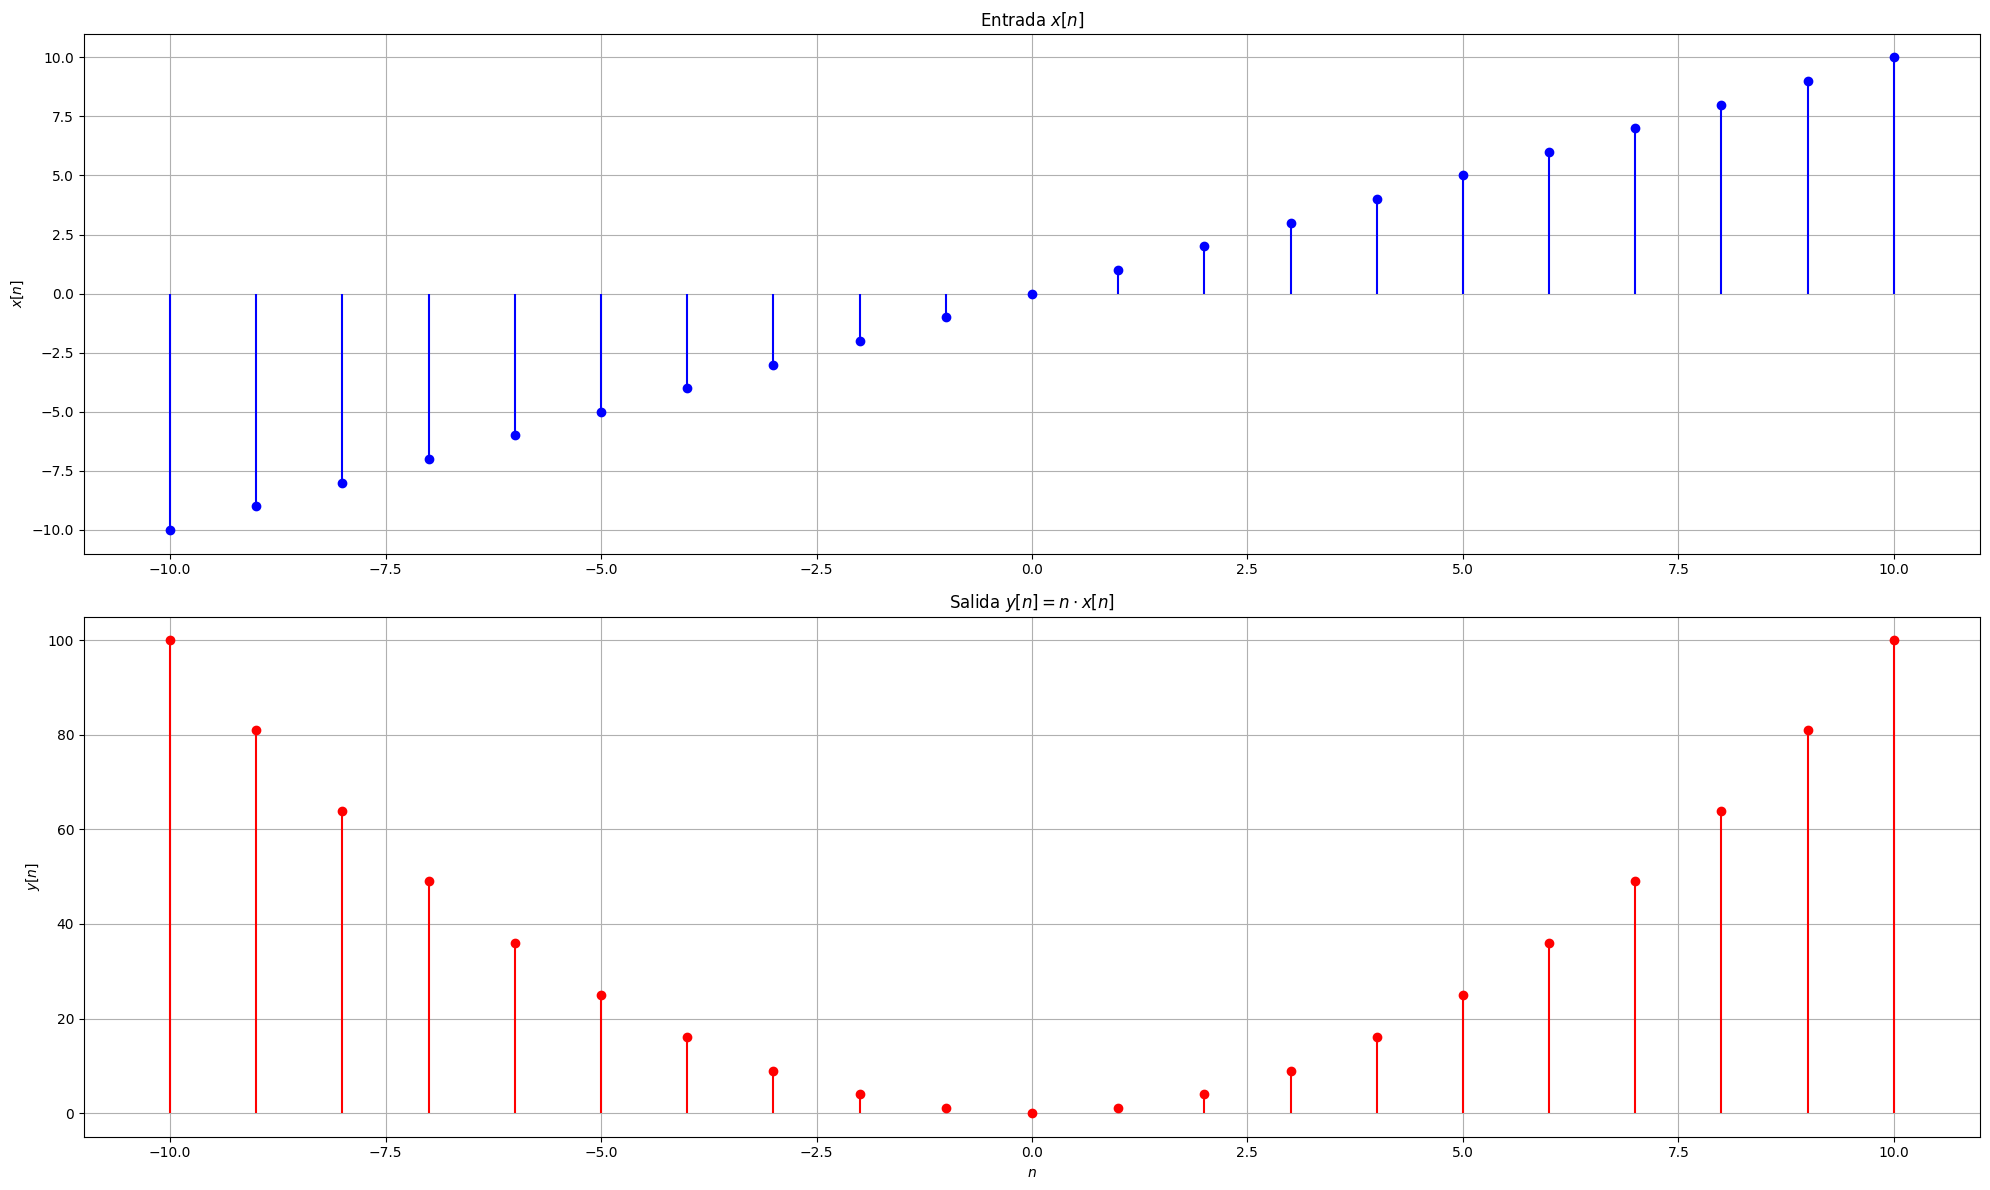

In [5]:
n = np.arange(-10, 11)
x = np.arange(-10, 11)
y = n * x


plt.figure(figsize=(20, 12))

plt.subplot(2, 1, 1)
plt.stem(n, x, basefmt=" ", linefmt='b-', markerfmt='bo')
plt.title("Entrada $x[n]$")
plt.ylabel("$x[n]$")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(n, y, basefmt=" ", linefmt='r-', markerfmt='ro')
plt.title(r"Salida $y[n] = n \cdot x[n]$")
plt.xlabel("$n$")
plt.ylabel("$y[n]$")
plt.grid(True)

plt.tight_layout()
plt.show()


**Ejercicio 2:** Considere el diagrama en bloques de la Figura 1 y encuentre la ecuación en diferencias para la señal de salida $y[n]$ en función de la señal de entrada $x[n]$.
![image.png](ejercicio2.png)

$$ y=\sqrt{ x[n]^2 + x[n-1]^2 + (-2 \cdot x[n-1] \cdot x[n])  } $$

**Ejercicio 3**: Considere el sistema LTI dado por la ecuación en diferencias:

$$
y[n] - 0.5y[n-1] + 0.25y[n-2] = x[n]
$$

(sistema inicialmente en reposo). Encuentre el diagrama en bloques que lo representa.


![image.png](ejercicio3.png)

**Ejercicio 4:** Encuentre la respuesta al impulso de los sistemas LTI causales descriptos por las siguientes ecuaciones en diferencias y clasifíquelos en función de ésta. Utilice condiciones iniciales nulas.

1. $$ y[n] - y[n-2] = x[n] $$

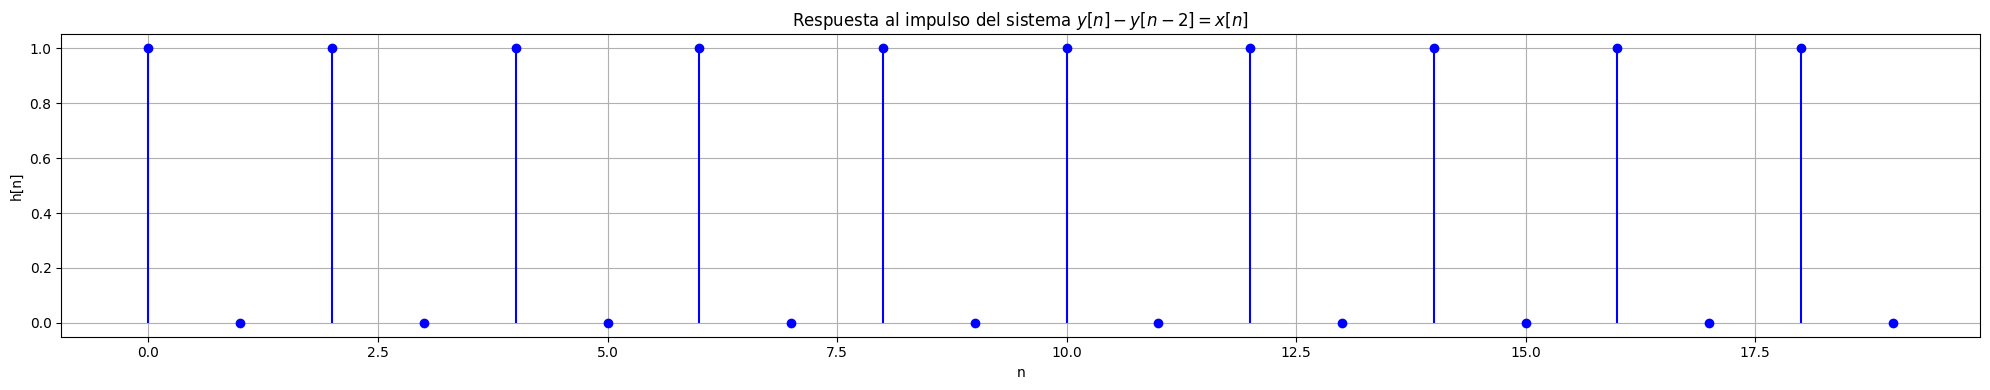

In [6]:


# Número de iteraciones (tiempo discreto n)
N = 20

# Entrada: impulso de Dirac
x = np.zeros(N)
x[0] = 1  # delta[n]

# Salida: respuesta al impulso
y = np.zeros(N)

# Ecuación: y[n] = x[n] + y[n-2]
for n in range(N):
    if n >= 2:
        y[n] = x[n] + y[n-2]
    else:
        y[n] = x[n]  # y[0] = x[0], y[1] = x[1] (x[1] = 0)

# Gráfico
plt.figure(figsize=(20, 4))
plt.stem(range(N), y, basefmt=" ", linefmt='b-', markerfmt='bo')
plt.title("Respuesta al impulso del sistema $y[n] - y[n-2] = x[n]$")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)
plt.tight_layout()
plt.show()


2. $$y[n] = x[n] + 0,5x[n − 1]$$

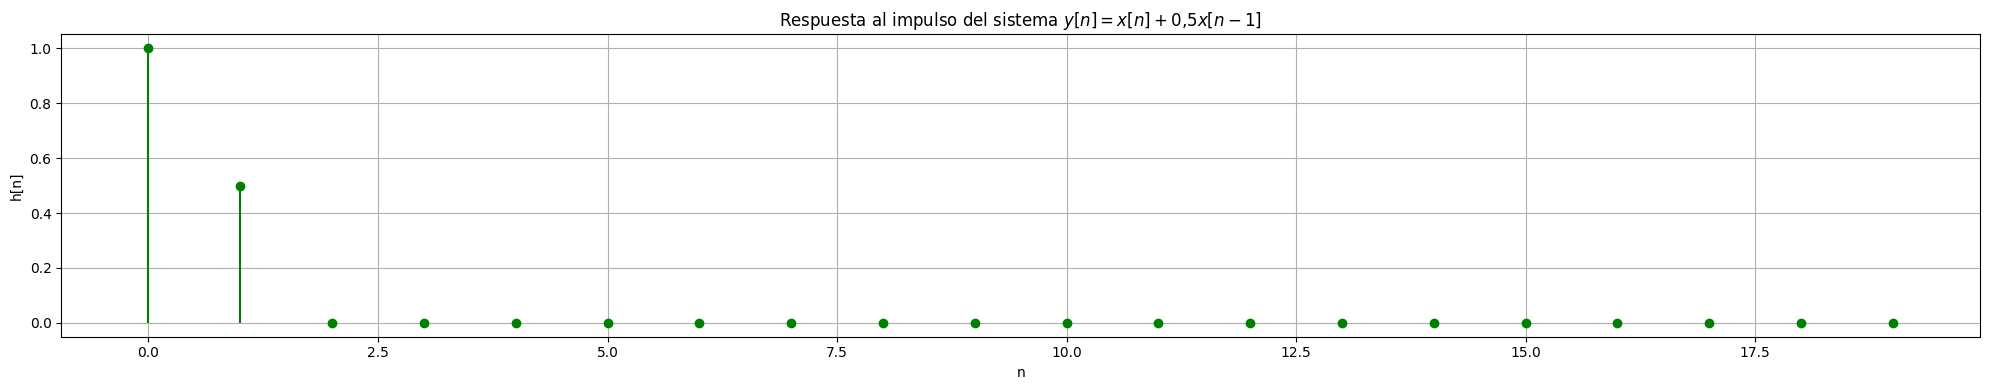

In [7]:


# Número de iteraciones
N = 20

# Entrada impulso unitario
x = np.zeros(N)
x[0] = 1  # delta[n]

# Salida (respuesta al impulso)
y = np.zeros(N)

# Ecuación: y[n] = x[n] + 0.5 * x[n-1]
for n in range(N):
    if n >= 1:
        y[n] = x[n] + 0.5 * x[n - 1]
    else:
        y[n] = x[n]

# Graficar
plt.figure(figsize=(20, 4))
plt.stem(range(N), y, basefmt=" ", linefmt='g-', markerfmt='go')
plt.title("Respuesta al impulso del sistema $y[n] = x[n] + 0{,}5x[n-1]$")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)
plt.tight_layout()
plt.show()


3. $$y[n] − 0,5y[n − 1] + 0,25y[n − 2] = x[n]$$

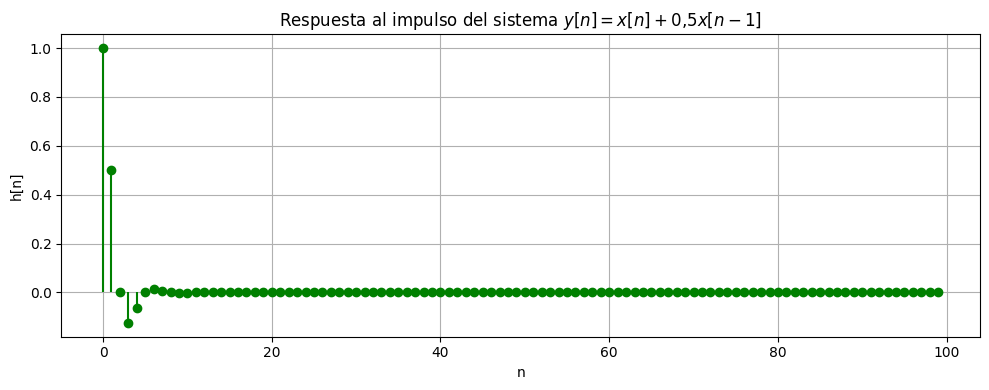

In [8]:

# Número de iteraciones
N = 100

# Entrada impulso unitario
x = np.zeros(N)
x[0] = 1  # delta[n]

# Salida (respuesta al impulso)
y = np.zeros(N)

# Ecuación: y[n] = x[n] + 0.5 * x[n-1]
for n in range(N):
    if n >= 1:
        y[n] = x[n] + 0.5 * y[n - 1] - 0.25 * y[n-2]
    else:
        y[n] = x[n]

# Graficar
plt.figure(figsize=(10, 4))
plt.stem(range(N), y, basefmt=" ", linefmt='g-', markerfmt='go')
plt.title("Respuesta al impulso del sistema $y[n] = x[n] + 0{,}5x[n-1]$")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)
plt.tight_layout()
plt.show()


## Parte 2: Convolución

**Ejercicio 1:** Implemente la convolución lineal mediante una sumatoria de convolución. Pruébela para convolucionar dos señales cualesquiera de longitud $N$ muestras. Compare los resultados con los obtenidos mediante la función `conv(x,y)` y con la función `filter`.

La función `Y = filter(B,A,X)` implementa la ecuación en diferencias, para los coeficientes dados en los vectores $A$ y $B$ y la señal de entrada $X$, según:

$$
a(1) \cdot y(n) = b(1) \cdot x(n) + b(2) \cdot x(n-1) + \dots - a(2) \cdot y(n-1) - \dots
$$

A partir de esto, determine los valores a ingresar en los vectores $A$ y $B$ para obtener la salida esperada.

Para la convolución Lineal, utilizamos la formula

$$y[n] = \sum_{k=0}^{N-1} x[k] \cdot h[n - k]$$



**np.convolve(x, h, mode='full')**

x: señal de entrada [2, 1, 0.5]

h: respuesta al impulso

mode='full': indica que se quiere toda la convolución, de longitud N+M−1.

**y_lfilter = lfilter(B, A, x)**

B = h = [1, 2, 2] → los coeficientes que multiplican a la entrada.

A = [1] → no hay realimentación (es un filtro FIR puro). Parametro útil para otras cosas, no lo usamos nosotros.

x = [2, 1, 0.5]

In [ ]:
def convolución_lineal(señal_x, señal_h):
    N = len(señal_x)
    M = len(señal_h)
    N_muestras = N + M - 1
    y = np.zeros(N_muestras)
    for n in range(N_muestras):
        suma = 0
        for k in range(N):
            if 0 <= (n - k) < M:
                    suma += señal_x[k] * señal_h[n - k] 
                    #print(f"x[{n}] * h[{n - k}] = {señal_x[k]} * {señal_h[n - k]} = {señal_x[k] * señal_h[n - k]}")        
        y[n] = suma
        
    
    return y 

y_manual = convolución_lineal([2,1,.5],[1,2,2])
print("Resultado de la convolución lineal:", y_manual)
y_np = np.convolve([2,1,.5], [1,2,2], mode='full')
print("Resultado de la convolución lineal con convolve", y_np)
y_lfilter = lfilter([1,2,2], [1], [2,1,.5])
print("Resultado de la convolución lineal con filter", y_np)


Resultado de la convolución lineal: [2.  5.  6.5 3.  1. ]
Resultado de la convolución lineal: [2.  5.  6.5 3.  1. ]
Resultado de la convolución lineal con convolve [2.  5.  6.5 3.  1. ]
Resultado de la convolución lineal con filter [2.  5.  6.5 3.  1. ]


**Ejercicio 2:** Escriba una función que realice la convolución circular discreta (también llamada convolución periódica) entre dos señales $x[n]$ y $h[n]$, ambas de longitud $N$ muestras, utilizando ciclos `for`. En esta se debe considerar:

- $x[n]$ como periódica
- $h[n]$ nula fuera de su rango de definición

La convolución circular se expresa mediante:

$$
y[k] = \sum_{l=1}^{N} h[l] \cdot x[((N + k - l) \bmod N) + 1] \quad \text{para} \quad 1 \leq k \leq N
$$

donde $mod$ es la operación módulo entero (resto de la división entera).


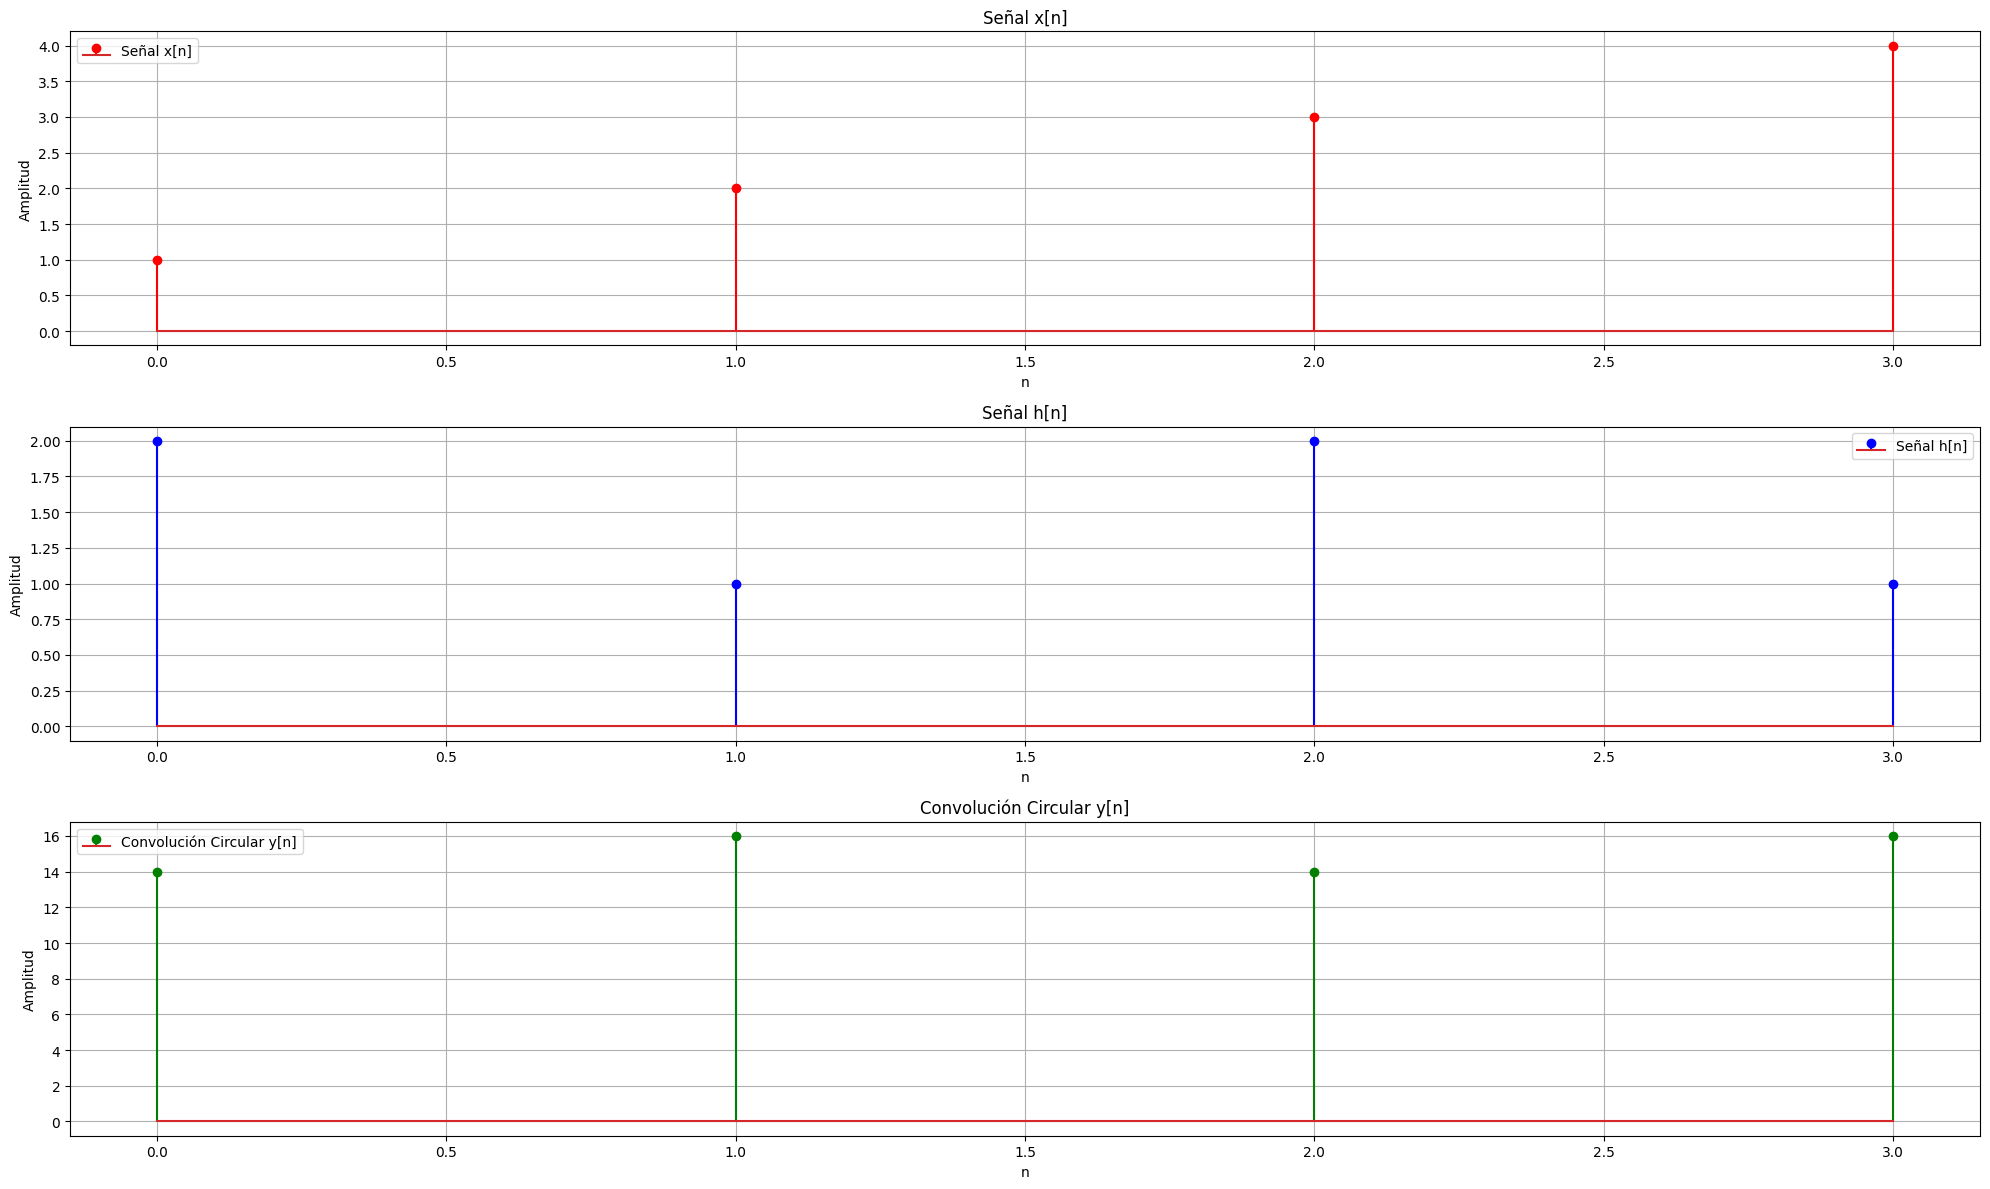

In [ ]:

def convolución_circular(señal_x, señal_h , N_muestras):
    y = np.zeros(N_muestras)
    for k in range(0,N_muestras):
        suma = 0
        for l in range(0,N_muestras):
            suma += señal_h[l] * señal_x[(N_muestras + k - l) % N_muestras] 
        y[k] = suma
    
    return y


result = convolución_circular(señal_x = [1,2,3,4],señal_h =[2,1,2,1], N_muestras = 4)

señal_x = [1, 2, 3, 4]
señal_h = [2, 1, 2, 1]
N_muestras = len(señal_x)



plt.figure(figsize=(20, 12))


plt.subplot(3, 1, 1)
plt.stem(range(N_muestras), señal_x, 'r-*', label="Señal x[n]")
plt.title('Señal x[n]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()


plt.subplot(3, 1, 2)
plt.stem(range(N_muestras), señal_h, 'b-o', label="Señal h[n]")
plt.title('Señal h[n]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()


plt.subplot(3, 1, 3)
plt.stem(range(N_muestras), result, 'g-s', label="Convolución Circular y[n]")
plt.title('Convolución Circular y[n]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


**Ejercicio 3**

Considere dos sistemas LTI conectados en **cascada** (Figura 2), con respuestas al impulso dadas por:

- $$ h_A[n] = \sin(8n) $$
- $$ h_B[n] = a^n $$

donde $a \in \mathbb{R},\ |a| < 1\ \text{y}\ 0 \leq n \leq N - 1$  y $N$ es el número de muestras distintas de cero.


1. Obtenga $N $ muestras de las respuestas al impulso $h_A[n]$ y $h_B[n]$, según las definiciones dadas.

2. Determine la salida $y[n]$ para una entrada:
    $x[n] = \delta[n] - a\delta[n - 1]$ siendo $ \delta[n] $ la función impulso unitario.

3. Invierta el orden de conexión de los sistemas y vuelva a calcular la salida.

4. Compare con la salida obtenida originalmente.

![image.png](ejercicio32.png)



[ 1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 -9.765625e-04  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00]


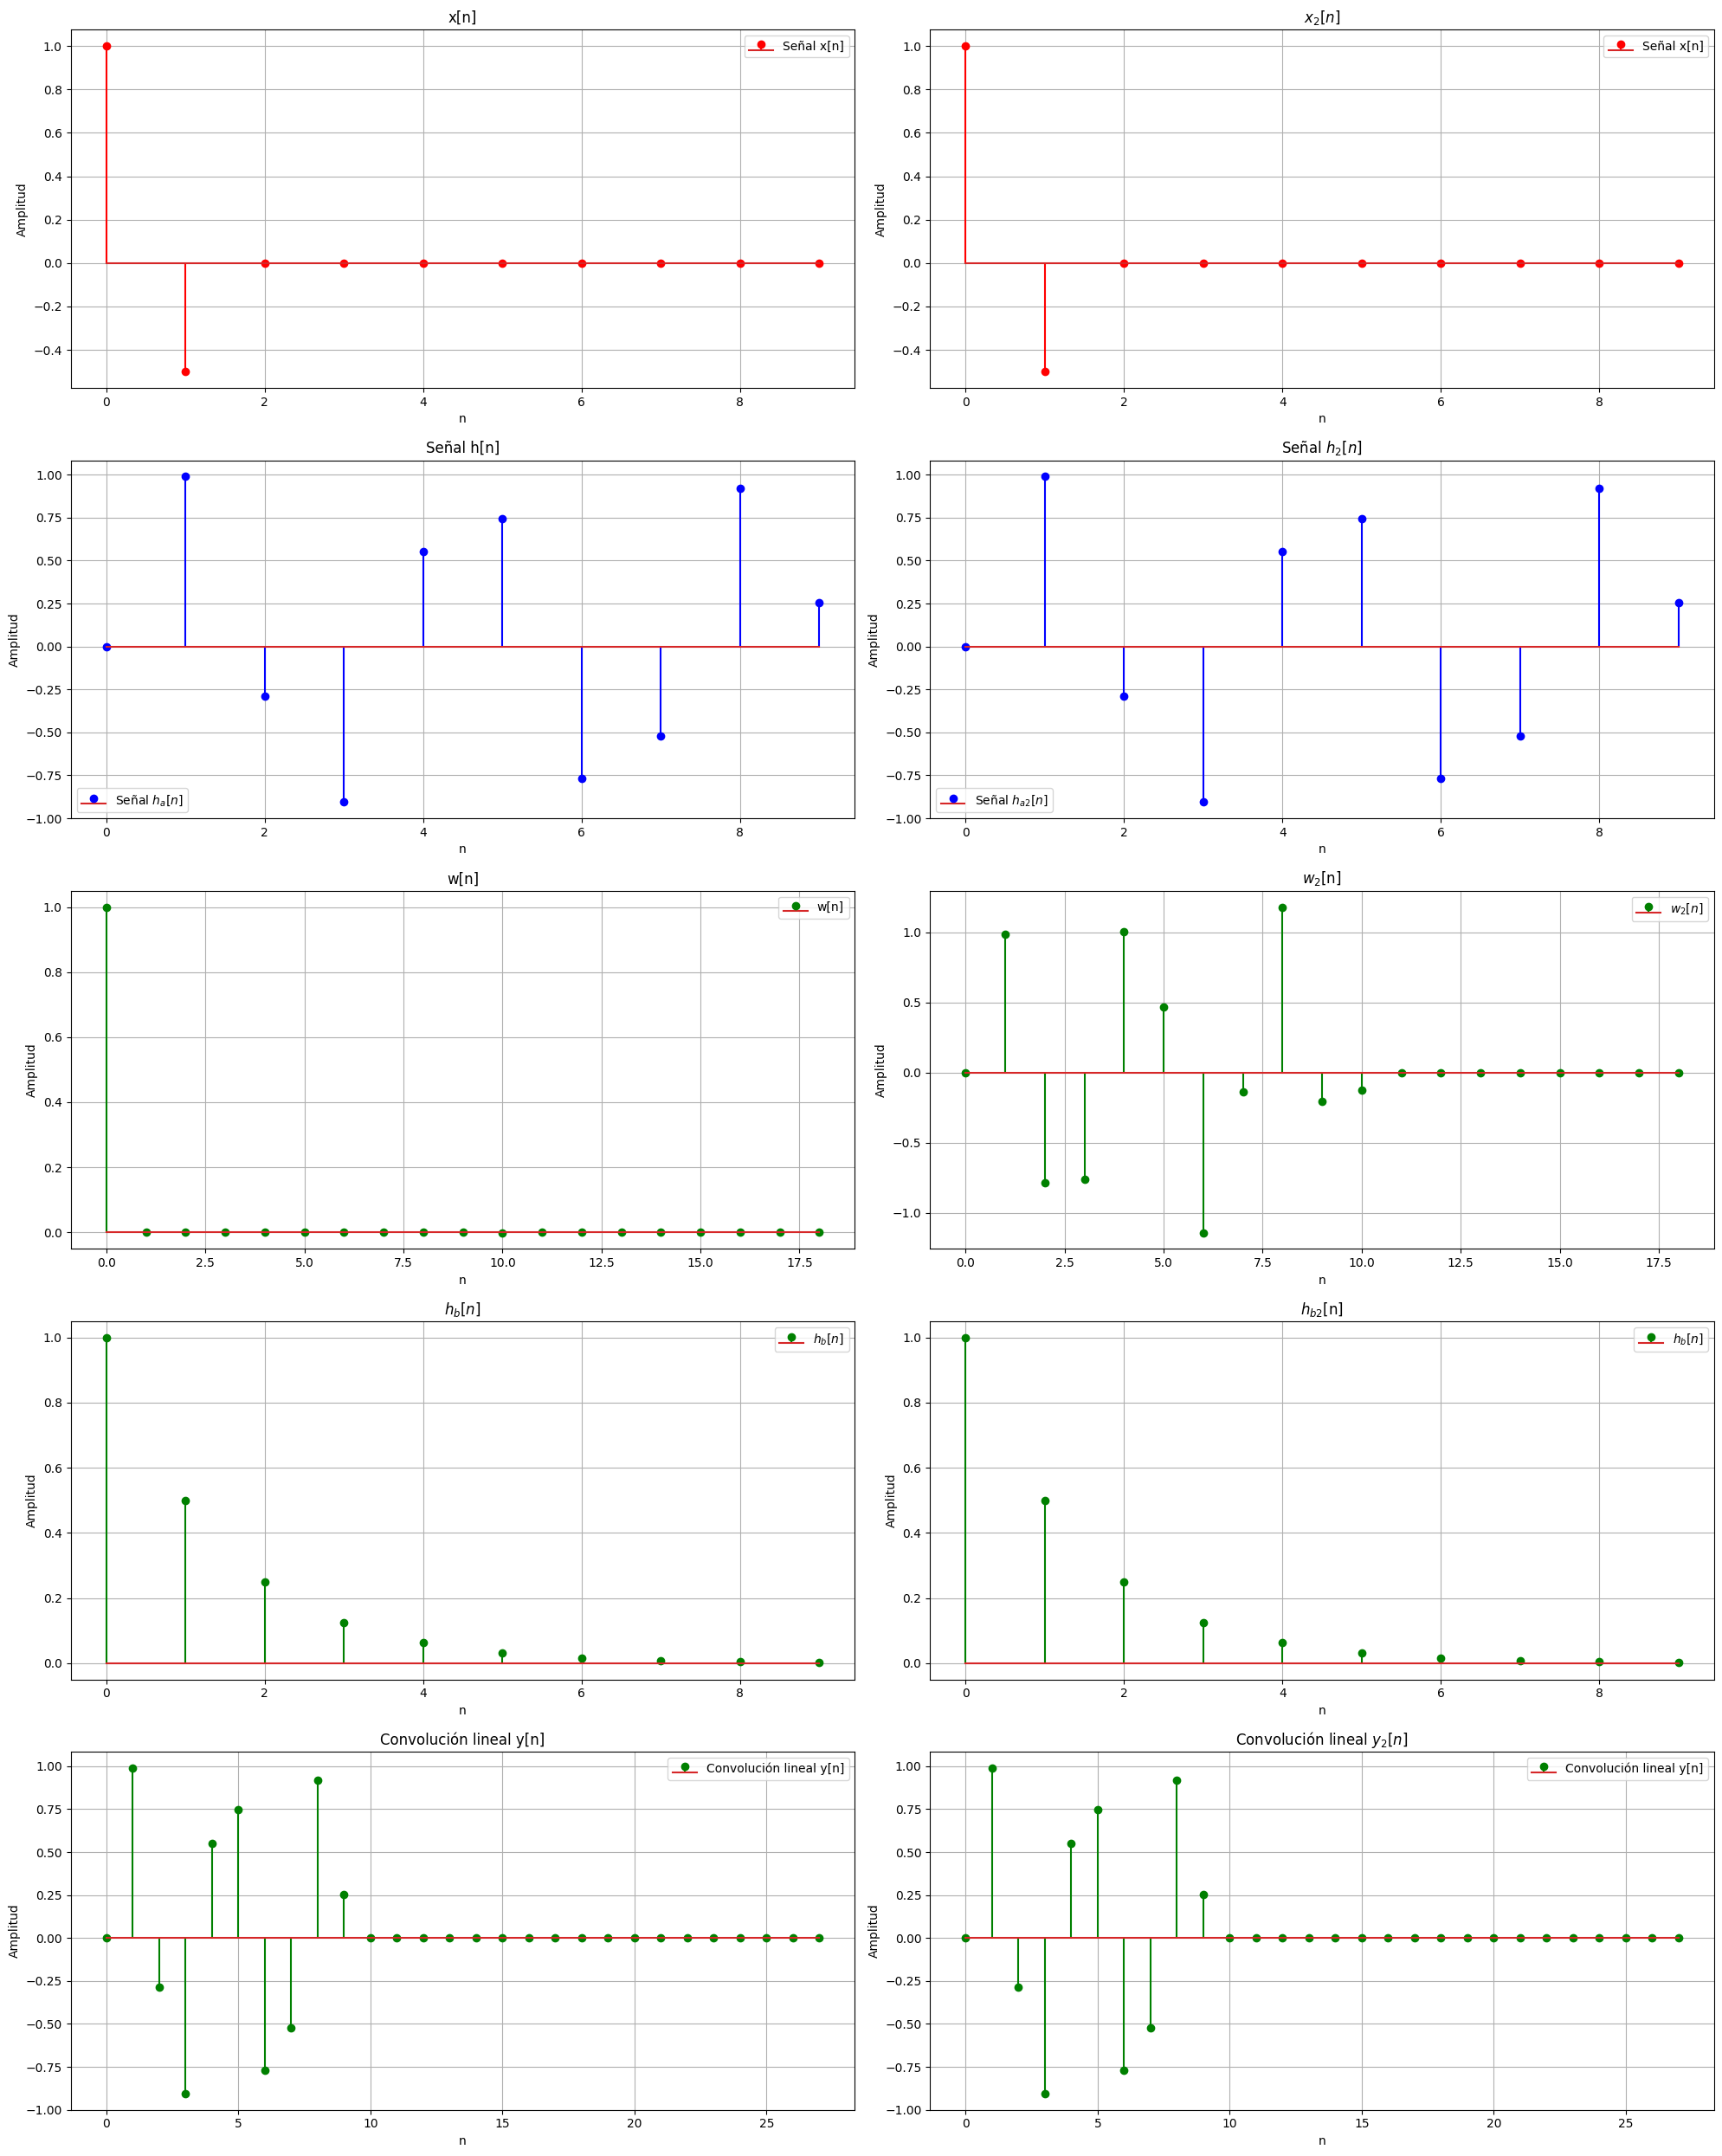

In [ ]:

def delta_dirac(n):
    if (n == 0):
        return 1
    else:
        return 0

def x_de_n(n, a):
    return delta_dirac(n) - a * delta_dirac(n-1) 

def h_de_a(n):
    return np.sin(8*n)

def h_de_b(n, a):
    return a ** n

def sistema_cascada(N,a, inversa = False):
    n = np.arange(0,N)
    x = np.zeros(N)
    x[0] = 1
    x[1] = -a
    h_a = h_de_a(n)
    h_b = h_de_b(n,a)
    w = convolución_lineal(x, h_a if inversa else h_b)
    y = convolución_lineal(w, h_b if inversa else h_a)
    
    return x, h_a, w, h_b, y
    


x,ha,w,hb ,y  = sistema_cascada(N=10, a=0.5)
print(w)
x2,ha2,w2,hb2 ,y2  = sistema_cascada(N=10, a=0.5, inversa = True)


plt.figure(figsize=(20, 25))

# Primera columna
plt.subplot(5, 2, 1)
plt.stem(np.arange(0,len(x)), x, 'r-*', label="Señal x[n]")
plt.title('x[n]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(5, 2, 2)
plt.stem(np.arange(0,len(x2)), x2, 'r-*', label="Señal x[n]")
plt.title('$x_{2}[n]$')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(5, 2, 3)
plt.stem(np.arange(0,len(ha)), ha, 'b-o', label="Señal $h_{a}[n]$")
plt.title('Señal h[n]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()


plt.subplot(5, 2, 4)
plt.stem(np.arange(0,len(ha2)), ha2, 'b-o', label="Señal $h_{a2}[n]$")
plt.title('Señal $h_{2}[n]$')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()


plt.subplot(5, 2, 5)
plt.stem(np.arange(0,len(w)), w, 'g-s', label="w[n]")
plt.title('w[n]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(5, 2, 6)
plt.stem(np.arange(0,len(w2)), w2, 'g-s', label="$w_{2}[n]$")
plt.title('$w_{2}$[n]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()


plt.subplot(5, 2, 7)
plt.stem(np.arange(0,len(hb)), hb, 'g-s', label="$h_{b}[n]$")
plt.title('$h_{b}[n]$')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(5, 2, 8)
plt.stem(np.arange(0,len(hb2)), hb2, 'g-s', label="$h_{b}[n]$")
plt.title('$h_{b2}$[n]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()


plt.subplot(5, 2, 9)
plt.stem(np.arange(0,len(y)), y, 'g-s', label="Convolución lineal y[n]")
plt.title('Convolución lineal y[n]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(5, 2, 10)
plt.stem(np.arange(0,len(y2)), y2, 'g-s', label="Convolución lineal y[n]")
plt.title('Convolución lineal $y_{2}[n]$')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()


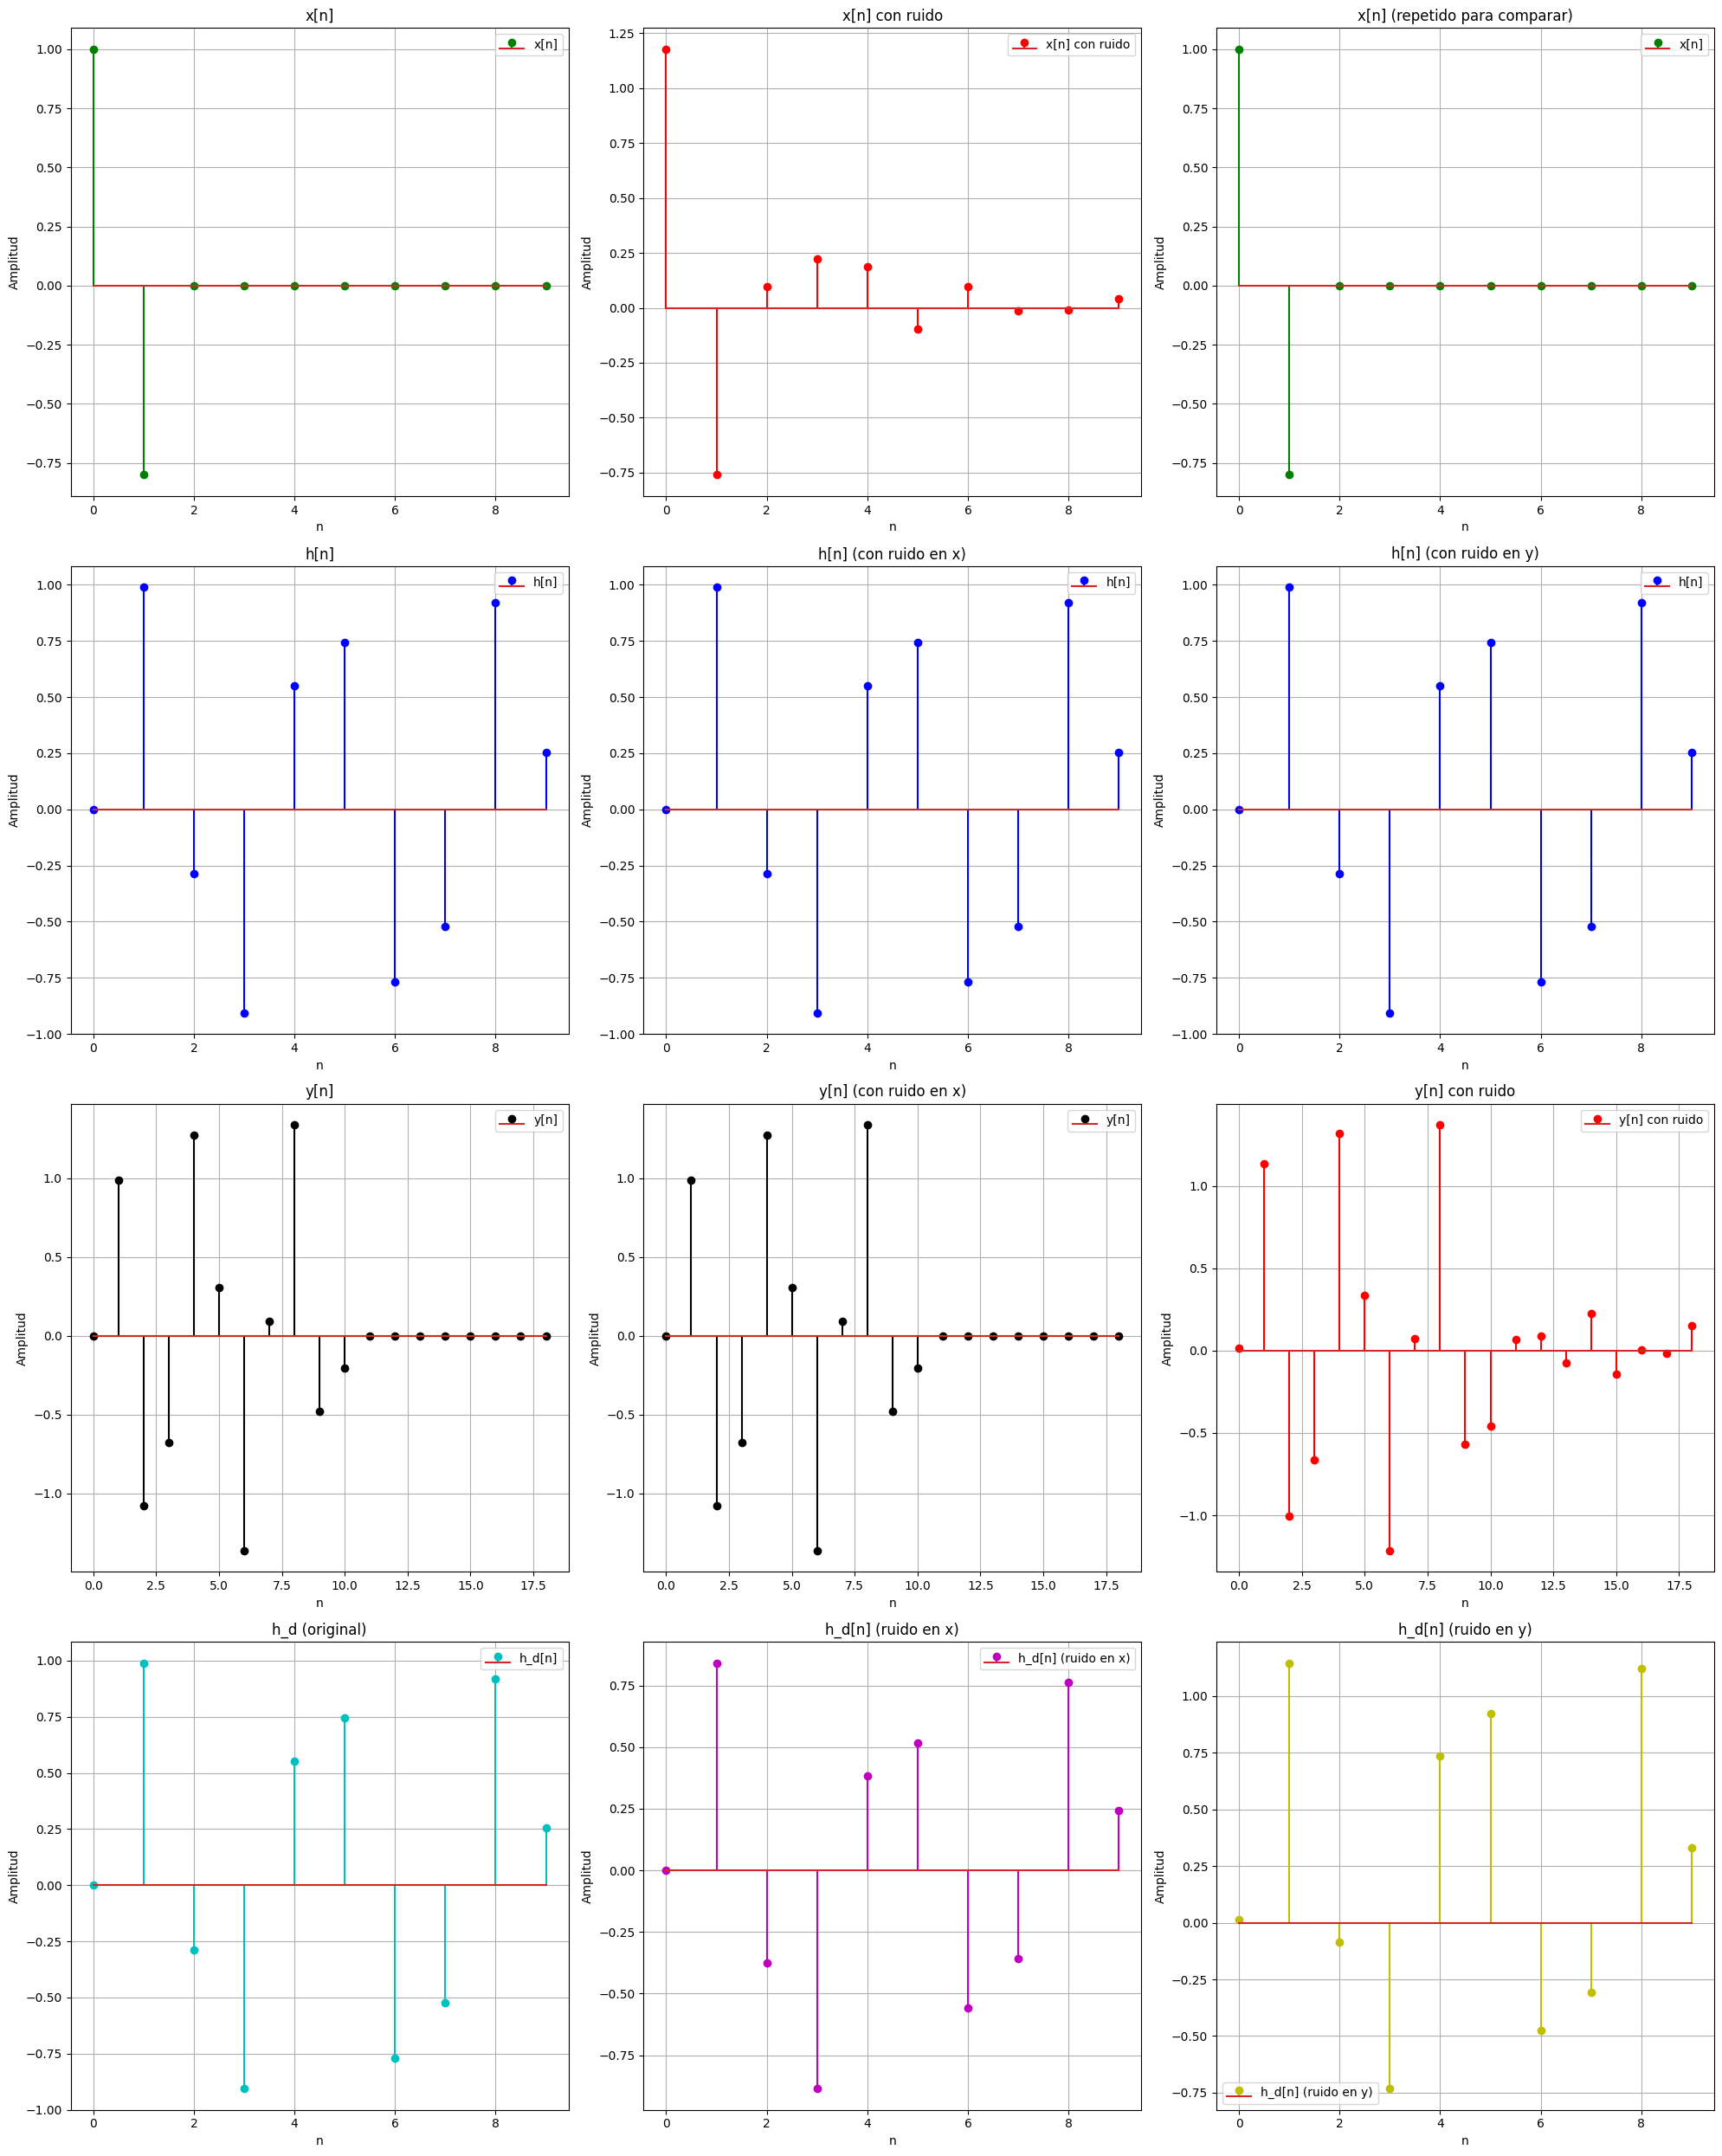

In [ ]:

# Señales base
def delta_dirac(n):
    return 1 if n == 0 else 0

def x_de_n(n, a):
    return np.array([delta_dirac(ni) - a * delta_dirac(ni - 1) for ni in n])

def h_de_a(n):
    return np.sin(8 * n)

# Parámetros
N = 10
a = 0.8
n = np.arange(N)

# Señales
x = x_de_n(n, a)
h = h_de_a(n)
y = convolve(x, h)

# Ruido
np.random.seed(0)
ruido_x = np.random.normal(0, 0.1, len(x))
ruido_y = np.random.normal(0, 0.1, len(y))

x_con_ruido = x + ruido_x
y_con_ruido = y + ruido_y

# Deconvoluciones
h_d = deconvolve(y, x)[0]
h_d_ruido_x = deconvolve(y, x_con_ruido)[0]
h_d_ruido_y = deconvolve(y_con_ruido, x)[0]

# Gráficas en tres columnas
plt.figure(figsize=(20, 25))

# Fila 1: x
plt.subplot(4, 3, 1)
plt.stem(np.arange(len(x)), x, 'g-*', label='x[n]')
plt.title('x[n]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(4, 3, 2)
plt.stem(np.arange(len(x_con_ruido)), x_con_ruido, 'r-*', label='x[n] con ruido')
plt.title('x[n] con ruido')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(4, 3, 3)
plt.stem(np.arange(len(x)), x, 'g-*', label='x[n]')
plt.title('x[n] (repetido para comparar)')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Fila 2: h
plt.subplot(4, 3, 4)
plt.stem(np.arange(len(h)), h, 'b-o', label='h[n]')
plt.title('h[n]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(4, 3, 5)
plt.stem(np.arange(len(h)), h, 'b-o', label='h[n]')
plt.title('h[n] (con ruido en x)')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(4, 3, 6)
plt.stem(np.arange(len(h)), h, 'b-o', label='h[n]')
plt.title('h[n] (con ruido en y)')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Fila 3: y
plt.subplot(4, 3, 7)
plt.stem(np.arange(len(y)), y, 'k-*', label='y[n]')
plt.title('y[n]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(4, 3, 8)
plt.stem(np.arange(len(y)), y, 'k-*', label='y[n]')
plt.title('y[n] (con ruido en x)')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(4, 3, 9)
plt.stem(np.arange(len(y_con_ruido)), y_con_ruido, 'r-*', label='y[n] con ruido')
plt.title('y[n] con ruido')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Fila 4: h_d
plt.subplot(4, 3, 10)
plt.stem(np.arange(len(h_d)), h_d, 'c-o', label='h_d[n]')
plt.title('h_d (original)')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(4, 3, 11)
plt.stem(np.arange(len(h_d_ruido_x)), h_d_ruido_x, 'm-o', label='h_d[n] (ruido en x)')
plt.title('h_d[n] (ruido en x)')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(4, 3, 12)
plt.stem(np.arange(len(h_d_ruido_y)), h_d_ruido_y, 'y-o', label='h_d[n] (ruido en y)')
plt.title('h_d[n] (ruido en y)')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
